# Siderite data within the Rock Magnetic Bestiary

In [10]:
import pmagpy.rockmag as rmag
import pmagpy.contribution_builder as cb
import pmagpy.ipmag as ipmag
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'

from bokeh.plotting import figure, show
from bokeh.io import output_notebook, save
output_notebook()

Loading BokehJS ...

## Import data

In [2]:
# set the MagIC ID for the data set here
magic_id = '20349'
# provide the share key for the data set
share_key = '11bafee8-bfcb-4147-88d8-6fcf60614317'
# set where you want the downloaded data to go
dir_path = 'example_data/siderite'

result, magic_file = ipmag.download_magic_from_id(magic_id, directory=dir_path, share_key=share_key)
ipmag.unpack_magic(magic_file, dir_path, print_progress=False)
siderite_contribution = cb.Contribution(dir_path)
measurements = siderite_contribution.tables['measurements'].df

Download successful. File saved to: example_data/siderite/magic_contribution_20349.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/RMB_notebooks/example_data/siderite/contribution.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/RMB_notebooks/example_data/siderite/locations.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/RMB_notebooks/example_data/siderite/sites.txt
3  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/RMB_notebooks/example_data/siderite/samples.txt
6  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/RMB_notebooks/example_data/siderite/specimens.txt
1243  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/RMB_notebooks/example_data/siderite/measurements.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


## Summarize experiments

In [3]:
rmag.make_experiment_df(measurements)

,specimen,method_codes,experiment
0,siderite_Dalizi-YP-01,LP-CW-SIRM:LP-MC,siderite_Dalizi-YP-01-LP-CW-SIRM:LP-MC-DC-9812
1,siderite_Dalizi-YP-01,LP-CW-SIRM:LP-MW,siderite_Dalizi-YP-01-LP-CW-SIRM:LP-MW-DC-9812
2,siderite_Dalizi-YP-01,LP-FC,siderite_Dalizi-YP-01-LP-FC-DC-9812
3,siderite_Dalizi-YP-01,LP-X:LP-X-T:LP-X-F,IRM-OldBlue-LP-X:LP-X-T:LP-X-F-9811
4,siderite_Dalizi-YP-01,LP-ZFC,siderite_Dalizi-YP-01-LP-ZFC-DC-9812
5,siderite_Roman-01,LP-CW-SIRM:LP-MC,siderite_Roman-01-LP-CW-SIRM:LP-MC-DC-9810
6,siderite_Roman-01,LP-CW-SIRM:LP-MW,siderite_Roman-01-LP-CW-SIRM:LP-MW-DC-9810
7,siderite_Roman-01,LP-FC,siderite_Roman-01-LP-FC-DC-9810
8,siderite_Roman-01,LP-MST,siderite_Roman-01-LP-MST-DC-9810
9,siderite_Roman-01,LP-ZFC,siderite_Roman-01-LP-ZFC-DC-9810


## specimen *siderite_Dalizi-YP-01*

In [4]:
specimen_name = 'siderite_Dalizi-YP-01'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data_dc(measurements, specimen_name)
rmag.plot_mpms_dc(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data,
                  plot_derivative=True,interactive=True, return_figure=False, show_plot=True)

FC_ZFC_ratio = fc_data['magn_mass'][0]/zfc_data['magn_mass'][0]
print(f"FC/ZFC ratio for {specimen_name}: {round(FC_ZFC_ratio,1)}")

FC/ZFC ratio for siderite_Dalizi-YP-01: 12.1


In [5]:
experiment_name = 'IRM-OldBlue-LP-X:LP-X-T:LP-X-F-9811'
Dalizi_ac_data = measurements[measurements['experiment'].str.contains(experiment_name, na=False)]
rmag.plot_mpms_ac(Dalizi_ac_data,
                  interactive=True,phase='in')

## specimen *siderite_Roman-01*

In [6]:
specimen_name = 'siderite_Roman-01'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data_dc(measurements, specimen_name)
rmag.plot_mpms_dc(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data,
                  plot_derivative=True,interactive=True)
FC_ZFC_ratio = fc_data['magn_mass'][0]/zfc_data['magn_mass'][0]
print(f"FC/ZFC ratio for {specimen_name}: {round(FC_ZFC_ratio,1)}")

FC/ZFC ratio for siderite_Roman-01: 17.4


In [7]:
experiment_name = 'siderite_Roman-01-LP-MST-DC-9810'
Roman_Ms_T = measurements[measurements['experiment'].str.contains(experiment_name, na=False)]
rmag.ms_t_plot(Roman_Ms_T, interactive=True)

## specimen *siderite_unk-01*

In [8]:
specimen_name = 'siderite_unk-01'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data_dc(measurements, specimen_name)
rmag.plot_mpms_dc(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data,
                  plot_derivative=True,interactive=True)
FC_ZFC_ratio = fc_data['magn_mass'][0]/zfc_data['magn_mass'][0]
print(f"FC/ZFC ratio for {specimen_name}: {round(FC_ZFC_ratio,1)}")

FC/ZFC ratio for siderite_unk-01: 94.5


### export figure for siderite chapter

'/Users/yimingzhang/Github/RockmagPy-notebooks/book/images/siderite_Roman-01.html'

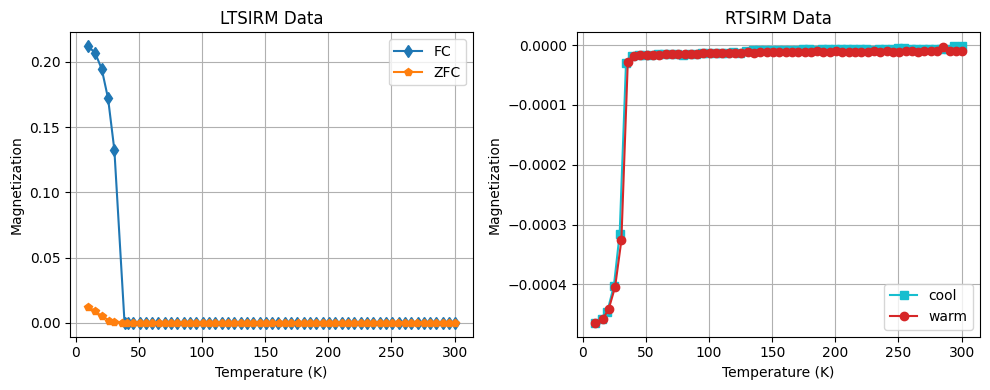

In [11]:
specimen_name = 'siderite_Roman-01'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data_dc(measurements, specimen_name)
fig = rmag.plot_mpms_dc(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data,
                        return_figure=True,show_plot=False)
fig.savefig('../book/images/siderite_Roman-01_MPMS.png', dpi=300, bbox_inches='tight')

bokeh_fig = rmag.plot_mpms_dc(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data,
                        interactive=True,return_figure=True,show_plot=False)
save(bokeh_fig, '../book/images/siderite_Roman-01.html')